<a href="https://colab.research.google.com/github/AkshayaBrianTauro/ComputerVision/blob/master/src/Test_Models_Segmentation_on_Oral_Cancer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Team Members:
###Akshaya Brian Tauro
###Emeline Fratacci
###Course Number : CS 512, Semester : Spring 2023



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Datasets

In [ ]:
input_oral_cancer_path = "/content/drive/MyDrive/CS 512 Computer Vision/CS512_final_course_project/data/oral cancer/cancer"
target_oral_cancer_path = "/content/drive/MyDrive/CS 512 Computer Vision/CS512_final_course_project/data/oral cancer/masks"

###Prepare the data

In [ ]:
import os
#get image paths and sort by name
input_oral_cancer_paths = sorted(
    [os.path.join(input_oral_cancer_path, fname)
    for fname in os.listdir(input_oral_cancer_path)[0:42]
        if fname.endswith(".jpg")]+
     [os.path.join(input_oral_cancer_path, fname)
    for fname in os.listdir(input_oral_cancer_path)[43:87]
        if fname.endswith(".jpg")]

        )
print("Total - Oral Cancer Input Samples", len(input_oral_cancer_paths))
# print(os.listdir(input_oral_cancer_path)[1:3])

target_oral_cancer_paths = sorted(
    [os.path.join(target_oral_cancer_path, fname)
    for fname in os.listdir(target_oral_cancer_path)
    if fname.endswith(".jpg") and not fname.startswith(".") ])
# print((target_isic_paths))
print("Total - Oral Cancer Target Samples", len(target_oral_cancer_paths))

Total - Oral Cancer Input Samples 86
Total - Oral Cancer Target Samples 86


**Visualize the oral cancer segmentation mask**

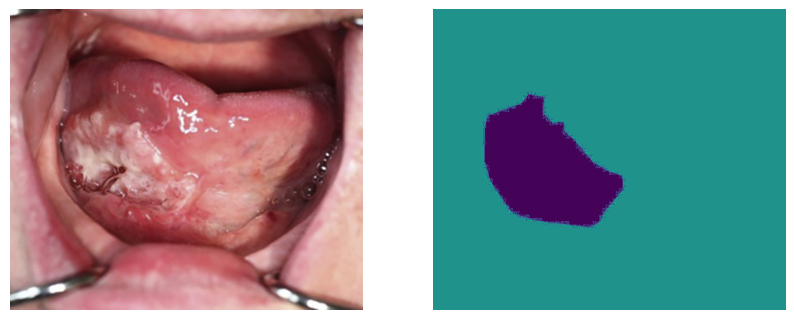

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

def display_target(target_array):
    normalized_array = (target_array.astype("uint8")-1)*127
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(load_img(input_oral_cancer_paths[35]))
    axs[0].axis('off')
    axs[1].imshow(normalized_array[:,:,0])
    axs[1].axis('off')
    plt.show()

img = img_to_array(load_img(target_oral_cancer_paths[35], color_mode = 'grayscale'))

display_target(img)

In [ ]:
import numpy as np
import random
img_size = (200,200) #resize images to 200 * 200
num_imgs = len(input_oral_cancer_paths) # total number of images

#use the same random seed to make sure images and segmentation maps match
random.Random(1337).shuffle(input_oral_cancer_paths)
random.Random(1337).shuffle(target_oral_cancer_paths)

#load image function
def path_to_input_image(path):
  return img_to_array(load_img(path, target_size = img_size))


#load segmentation map function
def path_to_target(path):
  img = img_to_array(load_img(path, target_size = img_size, color_mode = "grayscale"))
  return img

#load all images
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype = "float32") # RGB
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8") # gray


for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_oral_cancer_paths[i])
    targets[i] = path_to_target(target_oral_cancer_paths[i])

# print(len(input_imgs))
# num_classes = len(np.unique(targets))
# print("Number of unique classes:", num_classes)

# # assuming target masks are stored in a numpy array called `target_masks`
# unique_labels = np.unique(targets)

# print("Unique label names in target:", unique_labels)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
import random
from tensorflow.keras.preprocessing.image import array_to_img
from keras.models import load_model

Note: The trained model has MeanIOU which has to be updated. Hence, running the class Mean_IoU before loading the model

In [ ]:
import tensorflow as tf

# Bug fix code for MeanIOU keras
# From https://stackoverflow.com/questions/61824470/dimensions-mismatch-error-when-using-tf-metrics-meaniou-with-sparsecategorical

class Mean_IoU(tf.keras.metrics.MeanIoU):
  def __init__(self,
               num_classes=None,
               name=None,
               dtype=None,
               **kwargs):
    super(Mean_IoU, self).__init__(num_classes = num_classes,name=name, dtype=dtype,
        **kwargs)

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_pred = tf.math.argmax(y_pred, axis=-1)
    return super().update_state(y_true, y_pred, sample_weight)

**Test - Model of Exp 1**

1/1 [==============================] - 1s 916ms/step


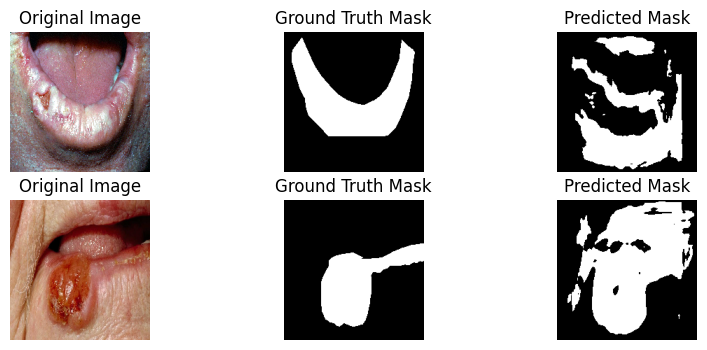

In [ ]:
model_path = ("/content/drive/MyDrive/CS 512 Computer Vision/CS512_final_course_project/data/models/Model-ISIC 2017 Dataset_Exp 1.h5")
model = load_model(model_path,  custom_objects={"Mean_IoU": Mean_IoU } )


# randomly select some test images
indices = random.sample(range(len(input_imgs)), 2)

# make predictions using the trained model
predicted_masks = model.predict(input_imgs[indices])

# display the original images, ground truth masks, and predicted masks
fig, axes = plt.subplots(len(indices), 3, figsize=(10, 4))

for i, index in enumerate(indices):
    # original image
    # axes[i, 0].imshow(test_input_imgs[index])
    img = array_to_img(input_imgs[index])
    axes[i, 0].imshow(img)
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original Image')

    # ground truth mask
    axes[i, 1].imshow(targets[index].squeeze(), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Ground Truth Mask')

    # predicted mask
    axes[i, 2].imshow(predicted_masks[i].argmax(axis=-1), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Predicted Mask')

plt.show()

**Test - Model of Exp 2**

1/1 [==============================] - 0s 118ms/step


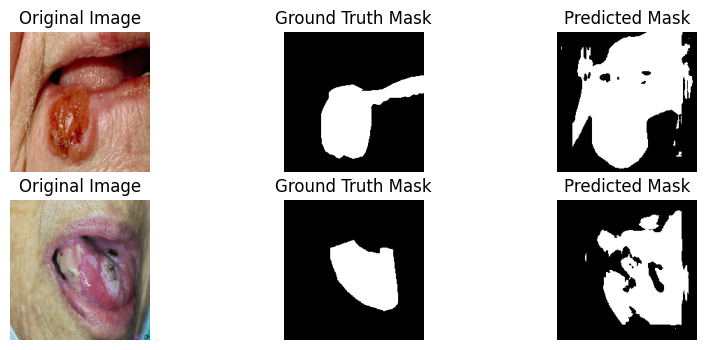

In [ ]:
model_path = ("/content/drive/MyDrive/CS 512 Computer Vision/CS512_final_course_project/data/models/Model-ISIC 2017 Dataset_Exp 2.h5")
model = load_model(model_path,  custom_objects={"Mean_IoU": Mean_IoU } )


# randomly select some test images
indices = random.sample(range(len(input_imgs)), 2)

# make predictions using the trained model
predicted_masks = model.predict(input_imgs[indices])

# display the original images, ground truth masks, and predicted masks
fig, axes = plt.subplots(len(indices), 3, figsize=(10, 4))

for i, index in enumerate(indices):
    # original image
    # axes[i, 0].imshow(test_input_imgs[index])
    img = array_to_img(input_imgs[index])
    axes[i, 0].imshow(img)
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original Image')

    # ground truth mask
    axes[i, 1].imshow(targets[index].squeeze(), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Ground Truth Mask')

    # predicted mask
    axes[i, 2].imshow(predicted_masks[i].argmax(axis=-1), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title('Predicted Mask')

plt.show()